In [ ]:
import os, glob
import scipy
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/My Drive/data2/images/training'

first_list = glob.glob(os.path.join(BASE_PATH, '붉은사슴뿔버섯/*.jpg'))
second_list = glob.glob(os.path.join(BASE_PATH, '새송이버섯/*.jpg'))
third_list = glob.glob(os.path.join(BASE_PATH, '표고버섯/*.jpg'))

first_img = img_to_array(load_img(first_list[0]), dtype=np.uint8)
second_img = img_to_array(load_img(second_list[0]), dtype=np.uint8)
third_img = img_to_array(load_img(third_list[0]), dtype=np.uint8)

plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
plt.title(len(first_list))
plt.imshow(first_img)

plt.subplot(1, 3, 2)
plt.title(len(second_list))
plt.imshow(second_img)

plt.subplot(1, 3, 3)
plt.title(len(third_list))
plt.imshow(third_img)

KeyboardInterrupt: ignored

# DataGenerator

In [ ]:
BASE_PATH = '/content/drive/My Drive/data2/images/training'

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.01,
    zoom_range=[0.9, 1.1],
    validation_split=0.1,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(
    validation_split=0.1,
    preprocessing_function=preprocess_input
)

train_gen = train_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(224, 224),
   classes=['가죽밤그물버섯','간버섯','갈색고리갓버섯','갈황색미치광이버섯','개암버섯','갯어리알버섯','검은쓴맛그물버섯','곰보버섯','구름버섯','국수버섯','그물코버섯','금무당버섯','기와버섯','꽃잎우단버섯','꽃흰목이','꾀꼬리버섯','나팔버섯','노란꼭지외대버섯','노란막광대버섯','노란분말그물버섯','노랑느타리','노랑망태버섯','노랑비늘버섯','노루궁뎅이버섯','녹변나팔버섯','느타리버섯','능이버섯','다색벚꽃버섯','다형콩꼬투리버섯','독우산광대버섯','들주발버섯','등갈색미로버섯','마귀곰보버섯','마귀광대버섯','말굽버섯','말징버섯','망태버섯','먼지버섯','모래밭버섯','목도리방귀버섯','목이버섯','무당버섯','미치광이버섯','민자주방망이버섯','바다말미잘버섯','방망이싸리버섯','뱀껍질광대버섯','뱀버섯','벼깜부기','보라끈적버섯','붉은바구니버섯','붉은사슴뿔버섯','비늘먹물버섯','비탈광대버섯','뿔나팔버섯','산호침버섯','새송이버섯','새주둥이버섯','세발버섯','소나무잔나비버섯','송로버섯','신알광대버섯','싸리버섯','아가리쿠스버섯','안장버섯','애기낙엽버섯','앵두낙엽버섯','양송이버섯','양파어리알버섯','여우꽃각시버섯','연자색끈적버섯','연지버섯','옥수수깜부기','이끼꽃버섯','이끼패랭이버섯','자주국수버섯','재먹물버섯','좀노란그물버섯','좀주름찻잔버섯','주름안장버섯','주발버섯','차가버섯','치마버섯','침유색고약버섯','꽁코투리버섯','털밤그물버섯','털작은입술잔버섯','테두리방귀버섯','팽이버섯','표고버섯','피즙갈색깔때기버섯','한입버섯','혀버섯','화경버섯','황색고무버섯','후지나팔버섯','흑자색쓴맛그물버섯','흰꼭지외대버섯','흰비늘고약버섯','흰찐빵버섯'],
    class_mode='categorical',
    batch_size=170,
    shuffle=True,
    subset='training'
)

val_gen = val_datagen.flow_from_directory(
    BASE_PATH,
    target_size=(224, 224),
    classes=['가죽밤그물버섯','간버섯','갈색고리갓버섯','갈황색미치광이버섯','개암버섯','갯어리알버섯','검은쓴맛그물버섯','곰보버섯','구름버섯','국수버섯','그물코버섯','금무당버섯','기와버섯','꽃잎우단버섯','꽃흰목이','꾀꼬리버섯','나팔버섯','노란꼭지외대버섯','노란막광대버섯','노란분말그물버섯','노랑느타리','노랑망태버섯','노랑비늘버섯','노루궁뎅이버섯','녹변나팔버섯','느타리버섯','능이버섯','다색벚꽃버섯','다형콩꼬투리버섯','독우산광대버섯','들주발버섯','등갈색미로버섯','마귀곰보버섯','마귀광대버섯','말굽버섯','말징버섯','망태버섯','먼지버섯','모래밭버섯','목도리방귀버섯','목이버섯','무당버섯','미치광이버섯','민자주방망이버섯','바다말미잘버섯','방망이싸리버섯','뱀껍질광대버섯','뱀버섯','벼깜부기','보라끈적버섯','붉은바구니버섯','붉은사슴뿔버섯','비늘먹물버섯','비탈광대버섯','뿔나팔버섯','산호침버섯','새송이버섯','새주둥이버섯','세발버섯','소나무잔나비버섯','송로버섯','신알광대버섯','싸리버섯','아가리쿠스버섯','안장버섯','애기낙엽버섯','앵두낙엽버섯','양송이버섯','양파어리알버섯','여우꽃각시버섯','연자색끈적버섯','연지버섯','옥수수깜부기','이끼꽃버섯','이끼패랭이버섯','자주국수버섯','재먹물버섯','좀노란그물버섯','좀주름찻잔버섯','주름안장버섯','주발버섯','차가버섯','치마버섯','침유색고약버섯','꽁코투리버섯','털밤그물버섯','털작은입술잔버섯','테두리방귀버섯','팽이버섯','표고버섯','피즙갈색깔때기버섯','한입버섯','혀버섯','화경버섯','황색고무버섯','후지나팔버섯','흑자색쓴맛그물버섯','흰꼭지외대버섯','흰비늘고약버섯','흰찐빵버섯'],
    class_mode='categorical',
    batch_size=170,
    shuffle=False,
    subset='validation'
)

print(val_gen.class_indices)

Found 116785 images belonging to 100 classes.
Found 12928 images belonging to 100 classes.
{'가죽밤그물버섯': 0, '간버섯': 1, '갈색고리갓버섯': 2, '갈황색미치광이버섯': 3, '개암버섯': 4, '갯어리알버섯': 5, '검은쓴맛그물버섯': 6, '곰보버섯': 7, '구름버섯': 8, '국수버섯': 9, '그물코버섯': 10, '금무당버섯': 11, '기와버섯': 12, '꽃잎우단버섯': 13, '꽃흰목이': 14, '꾀꼬리버섯': 15, '나팔버섯': 16, '노란꼭지외대버섯': 17, '노란막광대버섯': 18, '노란분말그물버섯': 19, '노랑느타리': 20, '노랑망태버섯': 21, '노랑비늘버섯': 22, '노루궁뎅이버섯': 23, '녹변나팔버섯': 24, '느타리버섯': 25, '능이버섯': 26, '다색벚꽃버섯': 27, '다형콩꼬투리버섯': 28, '독우산광대버섯': 29, '들주발버섯': 30, '등갈색미로버섯': 31, '마귀곰보버섯': 32, '마귀광대버섯': 33, '말굽버섯': 34, '말징버섯': 35, '망태버섯': 36, '먼지버섯': 37, '모래밭버섯': 38, '목도리방귀버섯': 39, '목이버섯': 40, '무당버섯': 41, '미치광이버섯': 42, '민자주방망이버섯': 43, '바다말미잘버섯': 44, '방망이싸리버섯': 45, '뱀껍질광대버섯': 46, '뱀버섯': 47, '벼깜부기': 48, '보라끈적버섯': 49, '붉은바구니버섯': 50, '붉은사슴뿔버섯': 51, '비늘먹물버섯': 52, '비탈광대버섯': 53, '뿔나팔버섯': 54, '산호침버섯': 55, '새송이버섯': 56, '새주둥이버섯': 57, '세발버섯': 58, '소나무잔나비버섯': 59, '송로버섯': 60, '신알광대버섯': 61, '싸리버섯': 62, '아가리쿠스버섯': 63, '안장버섯': 64, '애기낙엽버섯': 65, '앵두낙엽버섯': 66, '양송이버섯

# Load Model for Transfer Learning

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(100, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________________________

# Switch Layers to be Trainable

학습이진행하면서 layer의 weight가 변해야 학습이 진행되는데 혹시모르니깐 True로 함

In [ ]:
for layer in model.layers:
    layer.trainable = True

# Train

In [ ]:
history = model.fit_generator(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[
        ModelCheckpoint('/content/drive/My Drive/data2/model/mobileNetCheck.h5', monitor='val_acc', save_best_only=True, verbose=1)
    ]
)
model.save('/content/drive/My Drive/data2/model/mobileNet.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
102/687 [===>..........................] - ETA: 9:35:39 - loss: 1.3038 - acc: 0.6547

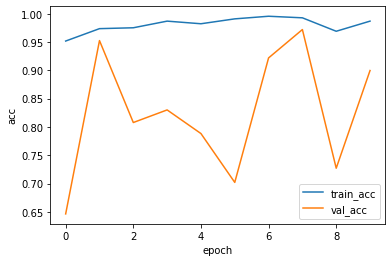

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [ ]:
model = load_model('/content/drive/My Drive/data/model/mobileNetCheck.h5')

In [ ]:
BASE_PATH = '/content/drive/My Drive/data/images/validation'

붉은사슴뿔버섯 or 새송이버섯 or 표고버섯중 하나 입력표고버섯
넘버입력1
표고버섯/1.jpg


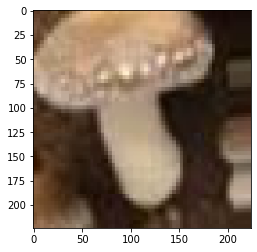

In [ ]:
state = input('붉은사슴뿔버섯 or 새송이버섯 or 표고버섯중 하나 입력')
num = input('넘버입력')
imgnum = state+'/' +num+ '.jpg'
print(imgnum)
test_img = img_to_array(load_img(os.path.join(BASE_PATH, imgnum), target_size=(224, 224)))

plt.imshow(test_img.astype(np.uint8))

In [ ]:
test_input = preprocess_input(np.expand_dims(test_img.copy(), axis=0))
pred = model.predict(test_input) #예측하기. 정확도(0~1사이)
print(pred)
print(pred[0][0]*100,pred[0][1]*100,pred[0][2]*100)

[[4.0102250e-15 6.0208714e-09 1.0000000e+00]]
4.010224972732755e-13 6.020871357037549e-07 100.0


표고버섯
100.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

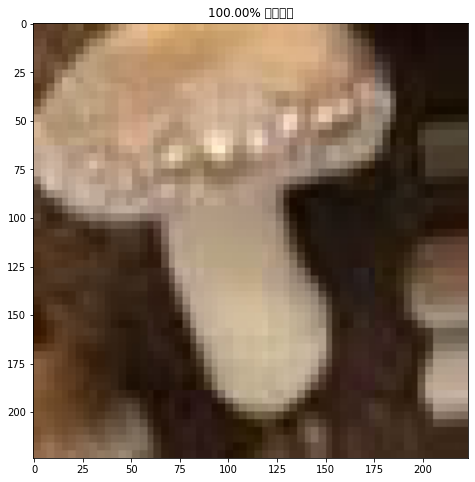

In [ ]:
plt.figure(figsize=(8, 8))

if pred[0][0] > pred[0][1] and pred[0][0] > pred[0][2] :
  print('붉은사슴뿔버섯')
  print(pred[0][0]*100)
  plt.title('%.2f%% 붉은사슴뿔버섯' % (pred[0][1] * 100))
elif pred[0][1] > pred[0][0] and pred[0][1] > pred[0][2] :
  print('새송이버섯')
  print(pred[0][1]*100)
  plt.title('%.2f%% 새송이버섯' % (pred[0][1] * 100))
elif pred[0][2] > pred[0][0] and pred[0][2] > pred[0][1] :
  print('표고버섯')
  print(pred[0][2]*100)
  plt.title('%.2f%% 표고버섯' % (pred[0][2] * 100))

plt.imshow(test_img.astype(np.uint8))